In [37]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [9]:
import json
pfda_root = '/Users/dragon/neo-human/repos/pydata-book/'
path = pfda_root + 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]
print('read {0} lines of type {1}'.format(len(records),type(records[0])))
print('\nkeys of first record: ', records[0].keys())
print('\nfirst record:', records[0])

read 3560 lines of type <class 'dict'>

keys of first record:  dict_keys(['l', 'cy', 'g', 'a', 'u', 'nk', 'c', 'hh', 'gr', 'al', 'r', 'tz', 't', 'hc', 'll', 'h'])

first record: {'l': 'orofrog', 'cy': 'Danvers', 'g': 'A6qOVH', 'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 'nk': 1, 'c': 'US', 'hh': '1.usa.gov', 'gr': 'MA', 'al': 'en-US,en;q=0.8', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'tz': 'America/New_York', 't': 1331923247, 'hc': 1331822918, 'll': [42.576698, -70.954903], 'h': 'wfLQtf'}


u here in front of the quotation stands for unicode

getting time zones

In [13]:
time_zones = [record['tz'] for record in records if 'tz' in record]
print('#time zones: {0}'.format(len(time_zones)))

#time zones: 3440


getting counts: way 1

In [14]:
def get_counts_1(sequence):
    counts = {}
    for x in sequence:
        if x not in counts:
            counts[x] = 0
        counts[x] += 1
    return counts
print(get_counts_1(time_zones))

{'': 521, 'Europe/Prague': 10, 'America/Tegucigalpa': 1, 'Pacific/Honolulu': 36, 'Europe/Volgograd': 1, 'America/Mazatlan': 1, 'Europe/Athens': 6, 'America/St_Kitts': 1, 'Asia/Novosibirsk': 1, 'Asia/Harbin': 3, 'Europe/Madrid': 35, 'America/Chihuahua': 2, 'America/Denver': 191, 'Europe/Moscow': 10, 'Europe/Stockholm': 14, 'Australia/NSW': 6, 'America/Argentina/Cordoba': 1, 'Asia/Beirut': 4, 'Asia/Kuala_Lumpur': 3, 'America/Halifax': 4, 'Europe/Helsinki': 10, 'Asia/Riyadh': 1, 'Europe/Malta': 2, 'Asia/Hong_Kong': 10, 'America/Monterrey': 1, 'Asia/Kuching': 1, 'America/Recife': 2, 'Africa/Lusaka': 1, 'Chile/Continental': 6, 'America/Vancouver': 12, 'Europe/Dublin': 3, 'America/Edmonton': 6, 'America/Winnipeg': 4, 'America/Los_Angeles': 382, 'Europe/Paris': 14, 'Europe/Amsterdam': 22, 'Asia/Istanbul': 9, 'Asia/Karachi': 3, 'Europe/Bratislava': 3, 'Asia/Amman': 2, 'America/Indianapolis': 20, 'Africa/Cairo': 3, 'Asia/Nicosia': 1, 'America/Puerto_Rico': 10, 'Asia/Bangkok': 6, 'America/Costa_

In [16]:
import collections as cl
def get_counts_2(sequence):
    counts = cl.defaultdict(int) # vals init to zero
    for record in sequence:
        counts[record] += 1
    return counts
print(get_counts_2(time_zones))

defaultdict(<class 'int'>, {'': 521, 'Europe/Prague': 10, 'America/Tegucigalpa': 1, 'Pacific/Honolulu': 36, 'Europe/Volgograd': 1, 'America/Mazatlan': 1, 'Europe/Athens': 6, 'America/St_Kitts': 1, 'Asia/Novosibirsk': 1, 'Asia/Harbin': 3, 'Europe/Madrid': 35, 'America/Chihuahua': 2, 'America/Denver': 191, 'Europe/Moscow': 10, 'Europe/Stockholm': 14, 'Australia/NSW': 6, 'America/Argentina/Cordoba': 1, 'Asia/Beirut': 4, 'Asia/Kuala_Lumpur': 3, 'America/Halifax': 4, 'Europe/Helsinki': 10, 'Asia/Riyadh': 1, 'Europe/Malta': 2, 'Asia/Hong_Kong': 10, 'America/Monterrey': 1, 'Asia/Kuching': 1, 'America/Recife': 2, 'Africa/Lusaka': 1, 'Chile/Continental': 6, 'America/Vancouver': 12, 'Europe/Dublin': 3, 'America/Edmonton': 6, 'America/Winnipeg': 4, 'America/Los_Angeles': 382, 'Europe/Paris': 14, 'Europe/Amsterdam': 22, 'Asia/Istanbul': 9, 'Asia/Karachi': 3, 'Europe/Bratislava': 3, 'Asia/Amman': 2, 'America/Indianapolis': 20, 'Africa/Cairo': 3, 'Asia/Nicosia': 1, 'America/Puerto_Rico': 10, 'Asia/B

get the top n counts

In [21]:
def top_counts(sequence, n=10):
    counts_tz = [(count, tz) for (tz, count) in get_counts_2(sequence).items()]
    counts_tz.sort(reverse=True)
    return counts_tz[:n]
print(top_counts(time_zones))

[(1251, 'America/New_York'), (521, ''), (400, 'America/Chicago'), (382, 'America/Los_Angeles'), (191, 'America/Denver'), (74, 'Europe/London'), (37, 'Asia/Tokyo'), (36, 'Pacific/Honolulu'), (35, 'Europe/Madrid'), (33, 'America/Sao_Paulo')]


using python std libraries

In [24]:
counts = cl.Counter(get_counts_2(time_zones))
print(type(counts))

<class 'collections.Counter'>


In [25]:
print(counts.most_common(10))

[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


using pandas

In [28]:
from pandas import DataFrame, Series
import pandas as pd

In [30]:
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [31]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [33]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [34]:
clean_tz = frame['tz'].fillna('missing')
clean_tz[clean_tz == ''] = 'unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

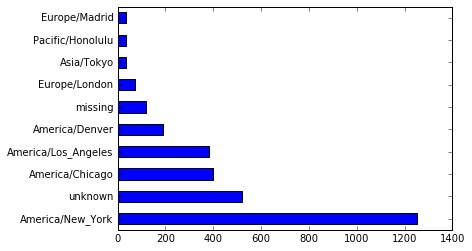

In [42]:
tz_counts[:10].plot(kind='barh', rot=0)
plt.show()